In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg, mean, dot

In [190]:
with open("../collect-data/src/files/nba_data.xlsx", "rb") as file:
    nba_stats_df = pd.read_excel(file, sheet_name="NBA Stats")
    mvp_df = pd.read_excel(file, sheet_name="MVP")

In [191]:
mvp_df["MVP?"] = 1
nba_stats_df["MVP?"] = 0

mvp_dict = mvp_df.to_dict("index")
nba_stats_dict = nba_stats_df.to_dict("index")

for k in mvp_dict:
    id = mvp_dict[k]["Unnamed: 0"]
    nba_stats_dict[id]["MVP?"] = 1

nba_stats_df = pd.DataFrame.from_dict(nba_stats_dict, orient="index")
nba_stats_df = nba_stats_df[nba_stats_df["RANK"] < 60]
print(nba_stats_df["MVP?"].value_counts())



MVP?
0    1626
1      27
Name: count, dtype: int64


In [192]:
nba_stats_df.head()

,Unnamed: 0,RANK,FIRST NAME,LAST NAME,SUFFIX,TEAM,AGE,GP,W,L,...,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,SEASON,MVP?
0,0,1,Luka,Doncic,NaN,DAL,25,63,40,23.0,...,249,93,34,131,3881,43,19,222,2023-24,0
1,1,2,Shai,Gilgeous-Alexander,NaN,OKC,25,70,50,20.0,...,154,147,64,175,3746,8,0,553,2023-24,0
2,2,3,Giannis,Antetokounmpo,NaN,MIL,29,68,43,25.0,...,234,81,69,199,3892,54,9,314,2023-24,0
3,3,4,Jayson,Tatum,NaN,BOS,26,68,53,15.0,...,173,70,40,136,3190,24,0,599,2023-24,0
4,4,5,Jalen,Brunson,NaN,NYK,27,67,43,24.0,...,161,61,13,125,2839,5,0,408,2023-24,0


In [193]:
nba_stats_df.columns

Index(['Unnamed: 0', 'RANK', 'FIRST NAME', 'LAST NAME', 'SUFFIX', 'TEAM',
       'AGE', 'GP', 'W', 'L', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL',
       'BLK', 'PF', 'FP', 'DD2', 'TD3', '+/-', 'SEASON', 'MVP?'],
      dtype='object')

In [194]:
nba_stats_df = nba_stats_df[['AGE', 'GP', 'W', 'L', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL',
       'BLK', 'PF', 'FP', 'DD2', 'TD3', 'MVP?']]

nba_stats_df.corr()

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,MVP?
AGE,1.000000,-0.073653,0.227910,-0.294559,-0.088320,-0.035448,-0.054484,-0.074668,0.037418,0.057833,...,-0.054320,0.048891,-0.139485,-0.088674,-0.074048,-0.164292,-0.040464,-0.009097,0.019678,0.032177
GP,-0.073653,1.000000,0.432555,0.378493,0.818059,0.385104,0.423172,0.448407,-0.008265,0.077248,...,0.235954,0.172396,0.319440,0.329391,0.101415,0.520097,0.429618,0.087618,-0.019199,0.038016
W,0.227910,0.432555,1.000000,-0.670813,0.339918,0.314251,0.313145,0.218595,0.248084,0.108784,...,0.163733,0.200104,0.114549,0.186077,0.133603,0.135187,0.374160,0.145100,0.079339,0.193559
L,-0.294559,0.378493,-0.670813,1.000000,0.323938,-0.005843,0.026605,0.144428,-0.261485,-0.048138,...,0.025996,-0.063624,0.145161,0.079914,-0.053738,0.289027,-0.030732,-0.076891,-0.097243,-0.167440
MIN,-0.088320,0.818059,0.339918,0.323938,1.000000,0.566627,0.593032,0.646508,-0.065696,0.058035,...,0.261893,0.300875,0.475367,0.489046,0.103870,0.471828,0.606145,0.165255,0.023879,0.069947
PTS,-0.035448,0.385104,0.314251,-0.005843,0.566627,1.000000,0.938249,0.910047,0.133567,0.256522,...,0.254627,0.329415,0.582568,0.320624,0.120648,0.205236,0.815148,0.243851,0.217446,0.246449
FGM,-0.054484,0.423172,0.313145,0.026605,0.593032,0.938249,1.000000,0.916586,0.268610,0.078716,...,0.383495,0.257450,0.519404,0.284270,0.218886,0.272812,0.827302,0.338202,0.207075,0.236597
FGA,-0.074668,0.448407,0.218595,0.144428,0.646508,0.910047,0.916586,1.000000,-0.128577,0.266163,...,0.167785,0.329221,0.552188,0.383318,0.021381,0.206896,0.721049,0.132100,0.162645,0.176858
FG%,0.037418,-0.008265,0.248084,-0.261485,-0.065696,0.133567,0.268610,-0.128577,1.000000,-0.444320,...,0.560409,-0.153216,-0.019619,-0.205705,0.500066,0.202043,0.322493,0.527581,0.122856,0.127997
3PM,0.057833,0.077248,0.108784,-0.048138,0.058035,0.256522,0.078716,0.266163,-0.444320,1.000000,...,-0.463354,0.238846,0.012494,0.137850,-0.450388,-0.286605,-0.034156,-0.416281,0.041890,0.021165


In [195]:
stats_df = nba_stats_df[['AGE', 'GP', 'L', 'MIN', 'PTS', 'FG%', '3P%', 'FT%', 'REB', 'AST', 'STL', 'BLK', 'TD3', 'MVP?']]

stats_df.corr()
# High correlation: TOV, W, FTM, FTA, FP, PF, 3PM, 3PA, DD2, FGM, FGA, OREB, DREB,

,AGE,GP,L,MIN,PTS,FG%,3P%,FT%,REB,AST,STL,BLK,TD3,MVP?
AGE,1.000000,-0.073653,-0.294559,-0.088320,-0.035448,0.037418,0.049423,0.159909,-0.054320,0.048891,-0.088674,-0.074048,0.019678,0.032177
GP,-0.073653,1.000000,0.378493,0.818059,0.385104,-0.008265,0.039320,-0.003733,0.235954,0.172396,0.329391,0.101415,-0.019199,0.038016
L,-0.294559,0.378493,1.000000,0.323938,-0.005843,-0.261485,-0.038317,-0.066277,0.025996,-0.063624,0.079914,-0.053738,-0.097243,-0.167440
MIN,-0.088320,0.818059,0.323938,1.000000,0.566627,-0.065696,0.038840,-0.031283,0.261893,0.300875,0.489046,0.103870,0.023879,0.069947
PTS,-0.035448,0.385104,-0.005843,0.566627,1.000000,0.133567,0.098919,0.120296,0.254627,0.329415,0.320624,0.120648,0.217446,0.246449
FG%,0.037418,-0.008265,-0.261485,-0.065696,0.133567,1.000000,-0.320442,-0.331735,0.560409,-0.153216,-0.205705,0.500066,0.122856,0.127997
3P%,0.049423,0.039320,-0.038317,0.038840,0.098919,-0.320442,1.000000,0.468259,-0.426930,0.192120,0.123634,-0.424655,0.015845,-0.016605
FT%,0.159909,-0.003733,-0.066277,-0.031283,0.120296,-0.331735,0.468259,1.000000,-0.478894,0.173424,0.000288,-0.446766,-0.084237,0.014206
REB,-0.054320,0.235954,0.025996,0.261893,0.254627,0.560409,-0.426930,-0.478894,1.000000,-0.221084,-0.042281,0.703194,0.228055,0.128111
AST,0.048891,0.172396,-0.063624,0.300875,0.329415,-0.153216,0.192120,0.173424,-0.221084,1.000000,0.481649,-0.312176,0.394257,0.143224


In [196]:
stats_df.var()

AGE         14.719415
GP          89.533312
L          132.327187
MIN     177659.919311
PTS     102857.088556
FG%         18.083783
3P%        128.053773
FT%         59.107753
REB      42719.063607
AST      27233.774371
STL       1135.836907
BLK       1967.031022
TD3          7.994426
MVP?         0.016077
dtype: float64

In [197]:
stats_df.cov()

,AGE,GP,L,MIN,PTS,FG%,3P%,FT%,REB,AST,STL,BLK,TD3,MVP?
AGE,14.719415,-2.673789,-12.999984,-142.823415,-43.616474,0.610478,2.145687,4.716711,-43.073798,30.954823,-11.465726,-12.599735,0.213463,0.015653
GP,-2.673789,89.533312,41.197892,3262.658462,1168.658105,-0.332551,4.210222,-0.271567,461.457027,269.198906,105.041653,42.560033,-0.513637,0.045609
L,-12.999984,41.197892,132.327187,1570.657961,-21.557938,-12.791337,-4.987779,-5.861530,61.807401,-120.780935,30.981700,-27.416553,-3.162836,-0.244222
MIN,-142.823415,3262.658462,1570.657961,177659.919311,76596.572837,-117.754193,185.254915,-101.374931,22815.486438,20928.347684,6947.078850,1941.734370,28.457609,3.738196
PTS,-43.616474,1168.658105,-21.557938,76596.572837,102857.088556,182.163649,358.999610,296.612194,16878.411723,17434.717735,3465.538690,1716.106420,197.179718,10.021779
FG%,0.610478,-0.332551,-12.791337,-117.754193,182.163649,18.083783,-15.420195,-10.845729,492.561784,-107.523230,-29.481338,94.314300,1.477184,0.069015
3P%,2.145687,4.210222,-4.987779,185.254915,358.999610,-15.420195,128.053773,40.738429,-998.536853,358.774935,47.151202,-213.126585,0.506975,-0.023825
FT%,4.716711,-0.271567,-5.861530,-101.374931,296.612194,-10.845729,40.738429,59.107753,-760.978206,220.031829,0.074683,-152.338003,-1.831126,0.013849
REB,-43.073798,461.457027,61.807401,22815.486438,16878.411723,492.561784,-998.536853,-760.978206,42719.063607,-7540.865642,-294.519791,6446.022336,133.273323,3.357374
AST,30.954823,269.198906,-120.780935,20928.347684,17434.717735,-107.523230,358.774935,220.031829,-7540.865642,27233.774371,2678.812813,-2284.854943,183.961494,2.996898


Text(0, 0.5, 'GP')

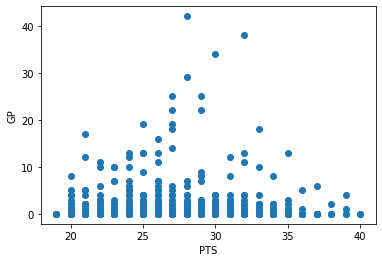

In [198]:
plt.scatter(stats_df.AGE, stats_df.TD3)
plt.xlabel("PTS")
plt.ylabel("GP")

In [201]:
num_components = 2
cov = stats_df.cov().to_numpy()
A = stats_df.to_numpy()
[eigvals, pcs] = linalg.eig(cov)

sorted_index = np.argsort(eigvals)[::-1]
eigvals = eigvals[sorted_index]
pcs = pcs[:,sorted_index]

M = (A - mean(A.T, axis=1)).T
projected = dot(pcs.T, M).T
projected = pd.DataFrame(projected[:,:num_components], columns=["pc1", "pc2"])
projected

,pc1,pc2
0,274.341146,-729.117914
1,271.095756,-666.607133
2,286.970067,-667.148995
3,165.019853,-424.814934
4,34.470914,-445.611083
...,...,...
1648,206.099496,362.734032
1649,357.365958,526.529190
1650,-385.837206,87.592385
1651,-50.627127,271.662336


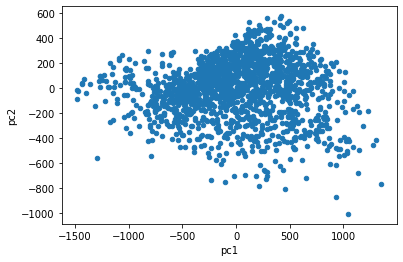

In [202]:
projected.plot(kind="scatter", x="pc1", y="pc2")

AttributeError: 'SubplotSpec' object has no attribute 'rowspan'

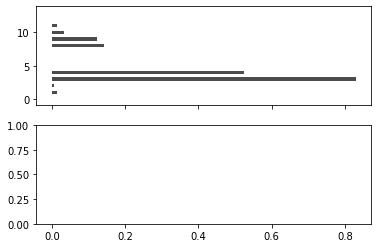

In [206]:
pc = pcs[:,:num_components]
fig, axes = plt.subplots(2,1,sharex=True)
attr = list(stats_df)
pcdata = pd.Series(pc[:,0], index=attr)
pcdata.plot(kind="barh", ax=axes[0], color="k", alpha=0.7)
axes[0].set_title(r"1st PC", size="x-large")
pcdata = pd.Series(pc[:,1], index=attr)
pcdata.plot(kind="barh", ax=axes[1], color="k", alpha=0.7)
axes[0].set_title(r"2nd PC", size="x-large")